In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from knetworks import knetworks, Network
from sklearn.preprocessing import StandardScaler
import numpy as np
%config InlineBackend.figure_format='retina'

import torch
import torch.nn as nn

device = torch.device("cuda")

In [2]:
centers = 6
samples = 300

In [3]:
file = open("../generated_users/davuser1.csv", "r") 
lines = file.readlines()

features = (sorted(lines[0].replace(" ", "").upper().split(",")))

vectors = []
num_features = len(features)
plot_rows, plot_cols = 2, 5#4, int((num_features+3)/4)
for l in range(len(lines)-1):
    vec = lines[l+1].upper().split(",")
    vectors.append([int(i) for i in vec])

In [6]:
knet = knetworks(centers,np.array(((),())), num_features, device)

/home/simon/Desktop/wettbewerbe/BwKI/GroceryListPredictor/precommender/kmeans.py:66: RuntimeWarning: Mean of empty slice.
  centroids = np.array([data[affiliations==k].mean(axis=0) for k in range(centroids.shape[0])])
/home/simon/Desktop/wettbewerbe/BwKI/GroceryListPredictor/precommender/knetworks.py:108: RuntimeWarning: divide by zero encountered in true_divide
  self.W = np.minimum((1/self.D**2), np.full(self.D.shape, 50))


In [7]:
tdata = np.array(vectors[:-4])

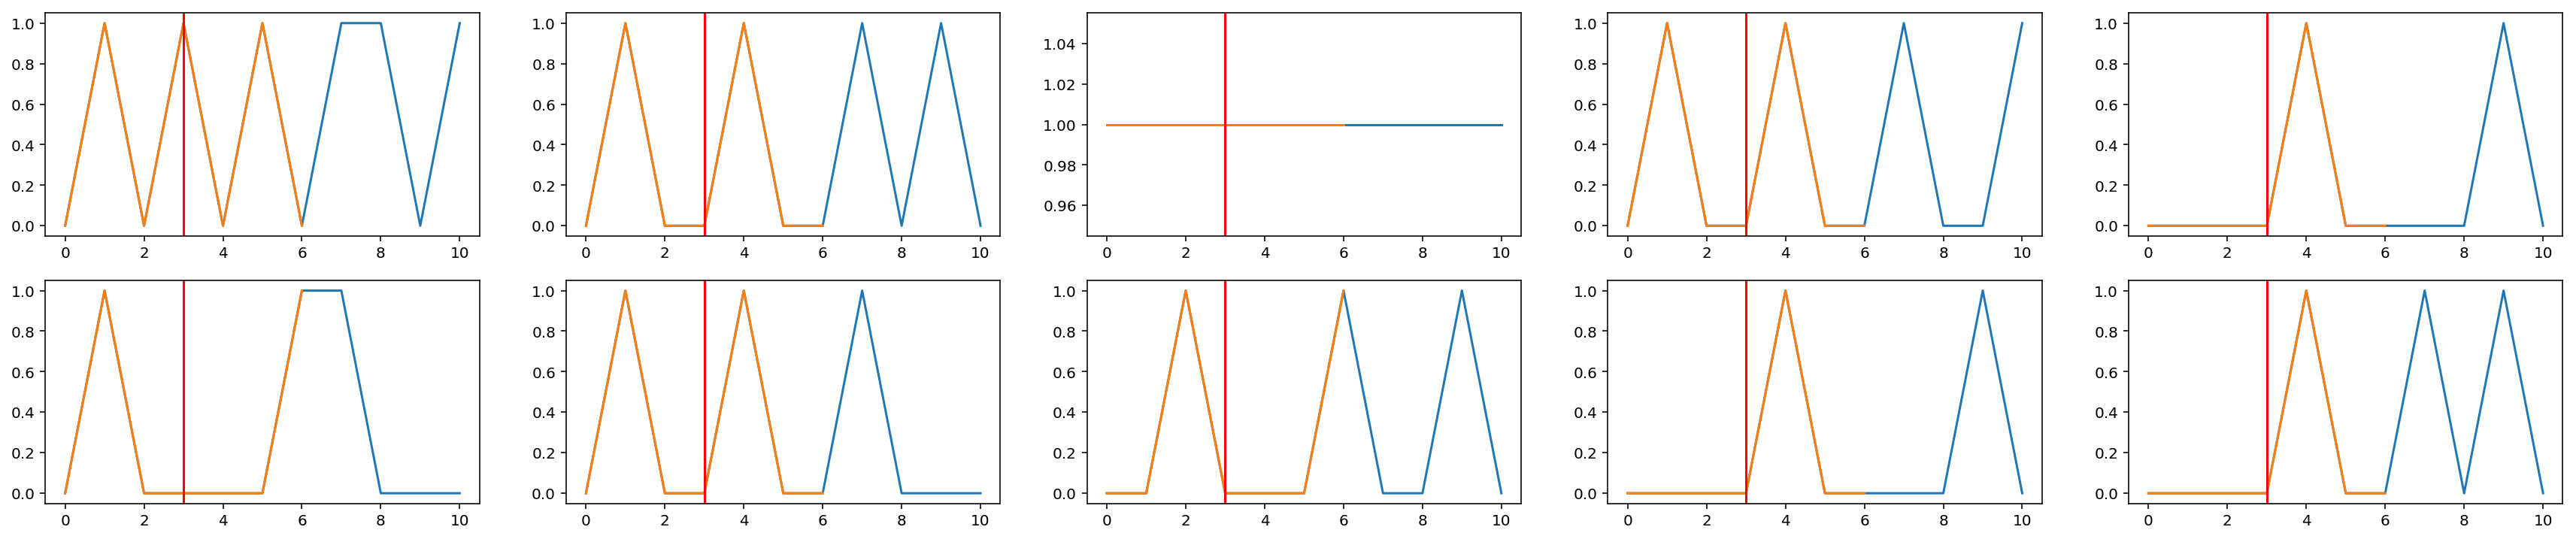

In [8]:

f, axes = plt.subplots(plot_rows, plot_cols, figsize=(30, 6))
count = 0
for i in range(plot_rows):
    for j in range(plot_cols):
        if count < num_features:
            axes[i][j].plot(np.array(vectors)[:,count])
            axes[i][j].plot(tdata[:,count])
            axes[i][j].axvline(x=3, ymin=0, ymax=1, c='r')
            count += 1

In [9]:
tdata.shape

(7, 25)

In [10]:
knet.calcProductMean(tdata, 7)

array([0.42857143, 0.28571429, 1.        , 0.28571429, 0.14285714,
       0.28571429, 0.28571429, 0.28571429, 0.14285714, 0.14285714,
       0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.28571429, 0.14285714, 0.14285714, 0.28571429,
       0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714])

In [11]:
net = knet.networks[0]

In [12]:
net.model.train()
net.train(tdata, epochs=500, verbose=True)

In [13]:
from scipy.special import expit
net.model.eval()
predict = np.array(net.predict(tdata, future=4))

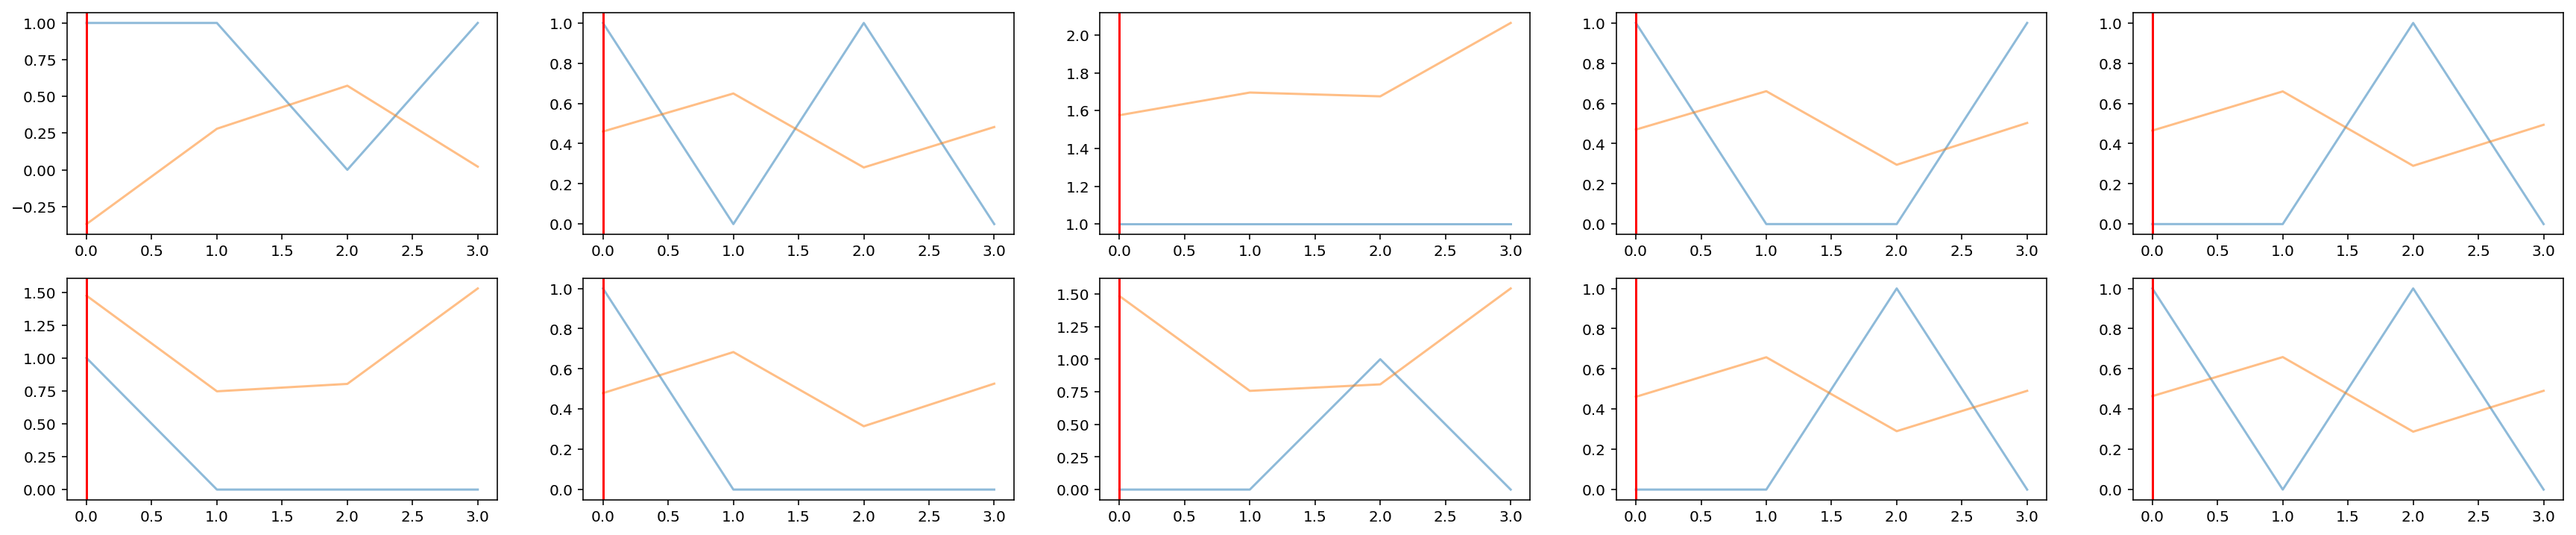

In [14]:
f, axes = plt.subplots(plot_rows, plot_cols, figsize=(30, 6))
count = 0
for i in range(plot_rows):
    for j in range(plot_cols):
        if count < num_features:
            axes[i][j].plot(np.array(vectors[-4:])[:,count], alpha=0.5)
            axes[i][j].plot(predict[:,count], alpha=0.5)
            axes[i][j].axvline(x=0, ymin=0, ymax=1, c='r')
            count += 1